# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print(pd.__version__)

2.2.2


In [ ]:
data = [10, 20, 30, 40, 50]
series = pd.Series(data)
display(series)

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df = pd.DataFrame(data_dict)
display(df)

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [ ]:
df_indexed = df.set_index('name')
display(df_indexed)

,age,city
name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [ ]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [ ]:
# 7. Show the first 10 entries of the dataframe.
display(chipo.head(10))

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
# 8. What is the number of observations (rows) and columns in the dataset?
print(chipo.shape)

(4622, 5)


In [ ]:
# 9. Print the name of all the columns.
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [ ]:
# 10. How is the dataset indexed?
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [ ]:
# 11. Check the data type of each column.
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [ ]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)
display(chipo.head())

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
# 13. Are there any missing values in the dataset? Check for nulls.
print(chipo.isnull().sum())

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [ ]:
# 14. Drop any duplicate rows, if they exist.
initial_rows = chipo.shape[0]
chipo.drop_duplicates(inplace=True)
print(f"Dropped {initial_rows - chipo.shape[0]} duplicate rows.")
display(chipo.head())

Dropped 59 duplicate rows.


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
display(chipo.head())

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


---
## Section 4: Filtering & Sorting


In [ ]:
# 16. Sort the dataframe by 'item_price' in descending order.
display(chipo.sort_values(by='item_price', ascending=False).head())

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25


In [ ]:
# 17. How many items cost more than $10.00?
items_over_10 = chipo[chipo['item_price'] > 10.00]
print(f"Number of items costing more than $10.00: {items_over_10.shape[0]}")

Number of items costing more than $10.00: 1123


In [ ]:
# 18. What is the price of each item?
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
item_prices = chipo[['item_name', 'item_price']].drop_duplicates()
display(item_prices.sort_values(by='item_price', ascending=False).head())

,item_name,item_price
3598,Chips and Fresh Tomato Salsa,44.25
3480,Carnitas Bowl,35.25
1254,Chicken Burrito,35.00
3601,Veggie Burrito,33.75
409,Chicken Bowl,32.94


In [ ]:
# 19. Select only the items where the name is 'Chicken Bowl'.
chicken_bowls = chipo[chipo['item_name'] == 'Chicken Bowl']
display(chicken_bowls.head())

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,8.49


In [ ]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
chicken_bowls_multiple = chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity'] > 1)]
display(chicken_bowls_multiple.head())

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50,35.00
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50,35.00


---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [ ]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url_drinks)

In [ ]:
# 22. Which continent drinks more beer on average?
most_beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax()
print(f"The continent that drinks more beer on average is: {most_beer_continent}")

The continent that drinks more beer on average is: EU


In [ ]:
# 23. For each continent, print the statistics for wine consumption.
wine_stats = drinks.groupby('continent')['wine_servings'].describe()
display(wine_stats)

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [ ]:
# 24. Print the mean alcohol consumption per continent for every column.
mean_alcohol_consumption = drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].mean()
display(mean_alcohol_consumption)

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,61.471698,16.339623,16.264151
AS,37.045455,60.840909,9.068182
EU,193.777778,132.555556,142.222222
OC,89.687500,58.437500,35.625000
SA,175.083333,114.750000,62.416667


In [ ]:
# 25. Print the median alcohol consumption per continent for every column.
median_alcohol_consumption = drinks.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].median()
display(median_alcohol_consumption)

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,32.0,3.0,2.0
AS,17.5,16.0,1.0
EU,219.0,122.0,128.0
OC,52.5,37.0,8.5
SA,162.5,108.5,12.0


---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [ ]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.
def get_price_level(price):
    return "High" if price > 10 else "Low"

chipo['price_level'] = chipo['item_price'].apply(get_price_level)
display(chipo.head())

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,Low
1,1,1,Izze,[Clementine],3.39,3.39,Low
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,Low
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,Low
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,High


In [ ]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
chipo['item_name'] = chipo['item_name'].apply(lambda x: x.upper())
display(chipo.head())

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
0,1,1,CHIPS AND FRESH TOMATO SALSA,NaN,2.39,2.39,Low
1,1,1,IZZE,[Clementine],3.39,3.39,Low
2,1,1,NANTUCKET NECTAR,[Apple],3.39,3.39,Low
3,1,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN,2.39,2.39,Low
4,2,2,CHICKEN BOWL,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,High


In [ ]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
selected_data = chipo.iloc[10:21, 1:4] # 21 is exclusive for rows, 4 for columns
display(selected_data)

,quantity,item_name,choice_description
10,1,CHIPS AND GUACAMOLE,NaN
11,1,CHICKEN CRISPY TACOS,"[Roasted Chili Corn Salsa, [Fajita Vegetables,..."
12,1,CHICKEN SOFT TACOS,"[Roasted Chili Corn Salsa, [Rice, Black Beans,..."
13,1,CHICKEN BOWL,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,..."
14,1,CHIPS AND GUACAMOLE,NaN
15,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN
16,1,CHICKEN BURRITO,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ..."
17,1,CHICKEN BURRITO,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice..."
18,2,CANNED SODA,[Sprite]
19,1,CHICKEN BOWL,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."


---
## Section 7: Merging & Joining


In [ ]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
merged_inner = pd.merge(df1, df2, on='ID', how='inner')
display(merged_inner)

,ID,Name,Score
0,2,Bob,85
1,3,Charlie,90


In [ ]:
# 30. Merge them on 'ID' using an outer join.
merged_outer = pd.merge(df1, df2, on='ID', how='outer')
display(merged_outer)

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0
3,4,NaN,95.0


In [ ]:
# 31. Merge them on 'ID' using a left join (keep all from df1).
merged_left = pd.merge(df1, df2, on='ID', how='left')
display(merged_left)

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [ ]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.
date_range = pd.date_range(start='2023-01-01', end='2023-01-10')
print(date_range)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.
df_time_series = pd.DataFrame({
    'Sales': np.random.randint(50, 150, size=len(date_range))
}, index=date_range)
display(df_time_series)

,Sales
2023-01-01,75
2023-01-02,75
2023-01-03,93
2023-01-04,149
2023-01-05,135
2023-01-06,123
2023-01-07,51
2023-01-08,135
2023-01-09,78
2023-01-10,111


In [ ]:
# 34. Resample the data to calculate the 3-day sum of sales.
resampled_sales = df_time_series['Sales'].resample('3D').sum()
display(resampled_sales)

,Sales
2023-01-01,243
2023-01-04,407
2023-01-07,264
2023-01-10,111


In [ ]:
# 35. Shift the 'Sales' column by 1 day (create a lag column).
df_time_series['Sales_Lag1'] = df_time_series['Sales'].shift(1)
display(df_time_series)

,Sales,Sales_Lag1
2023-01-01,75,NaN
2023-01-02,75,75.0
2023-01-03,93,75.0
2023-01-04,149,93.0
2023-01-05,135,149.0
2023-01-06,123,135.0
2023-01-07,51,123.0
2023-01-08,135,51.0
2023-01-09,78,135.0
2023-01-10,111,78.0


---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [ ]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url_titanic)

In [ ]:
# 37. How many passengers survived? (Survived=1)
survived_count = titanic_df['Survived'].sum()
print(f"Number of passengers who survived: {survived_count}")

Number of passengers who survived: 342


In [ ]:
# 38. What is the average age of passengers?
average_age = titanic_df['Age'].mean()
print(f"Average age of passengers: {average_age:.2f}")

Average age of passengers: 29.70


In [ ]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
survival_rate_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
display(survival_rate_by_pclass)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
# 40. Fill missing values in the 'Age' column with the median age.
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)
print(f"Missing 'Age' values after filling: {titanic_df['Age'].isnull().sum()}")
display(titanic_df.head())

Missing 'Age' values after filling: 0


/tmp/ipython-input-345762914.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
pivot_table_age = titanic_df.pivot_table(values='Age', index='Sex', columns='Pclass', aggfunc='mean')
display(pivot_table_age)

Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


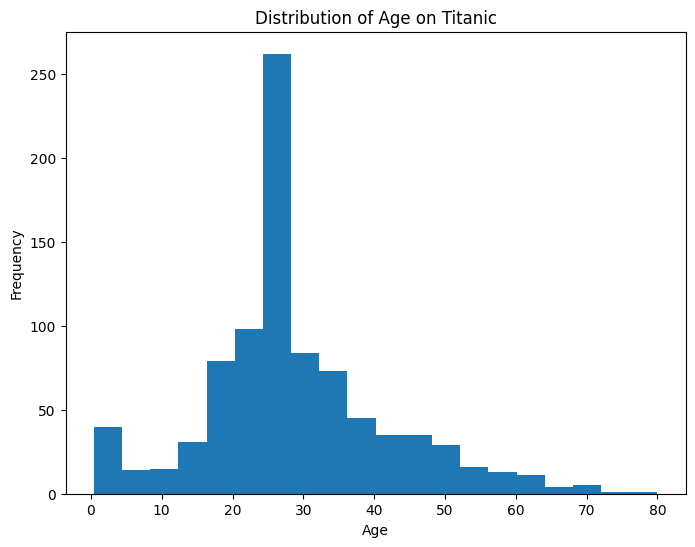

In [ ]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
titanic_df['Age'].hist(bins=20)
plt.title('Distribution of Age on Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

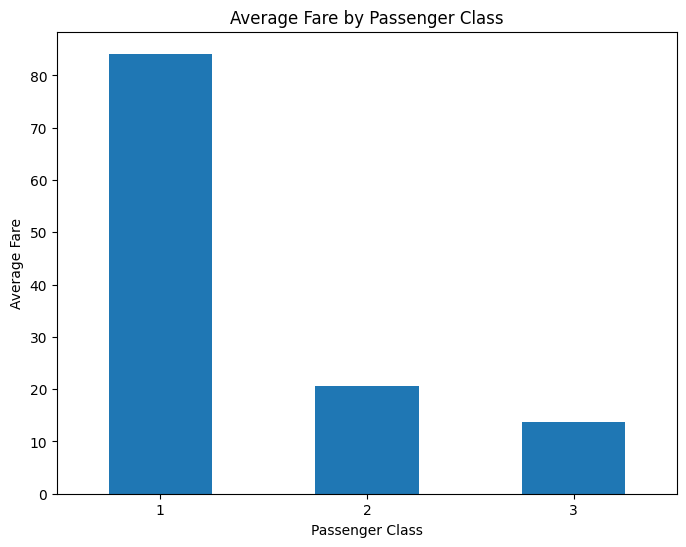

In [ ]:
# 43. Plot a bar chart of the average fare by Pclass.
import matplotlib.pyplot as plt

avg_fare_by_pclass = titanic_df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
avg_fare_by_pclass.plot(kind='bar')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
